In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#set plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")


In [4]:
#laod data
matches=pd.read_csv("../data/matches.csv")
deliveries=pd.read_csv("../data/deliveries.csv")      

In [7]:
#basic exploration 
print(matches.shape)
print("1")
print(deliveries.shape)

(1095, 20)
1
(260920, 17)


In [8]:
display(matches.head(5))
display(deliveries.head(5))

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
print("\nMatches info")
display(matches.info())


Matches info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  

None

In [10]:
print("\ndeliveries info")
display(deliveries.info())


deliveries info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           935

None

In [11]:
matches['date']=pd.to_datetime(matches['date'])

In [12]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1092 non-null   float64

In [14]:
mat=matches.groupby('toss_winner')['winner'].sum().reset_index()

In [15]:
mat

,toss_winner,winner
0,Chennai Super Kings,Chennai Super KingsChennai Super KingsDelhi Da...
1,Deccan Chargers,Kolkata Knight RidersDelhi DaredevilsDeccan Ch...
2,Delhi Capitals,Chennai Super KingsDelhi CapitalsKings XI Punj...
3,Delhi Daredevils,Kings XI PunjabMumbai IndiansKings XI PunjabDe...
4,Gujarat Lions,Gujarat LionsGujarat LionsGujarat LionsKings X...
5,Gujarat Titans,Gujarat TitansGujarat TitansGujarat TitansGuja...
6,Kings XI Punjab,Rajasthan RoyalsKings XI PunjabKings XI Punjab...
7,Kochi Tuskers Kerala,Royal Challengers BangalorePune WarriorsKochi ...
8,Kolkata Knight Riders,Chennai Super KingsMumbai IndiansKolkata Knigh...
9,Lucknow Super Giants,Lucknow Super GiantsLucknow Super GiantsRajast...


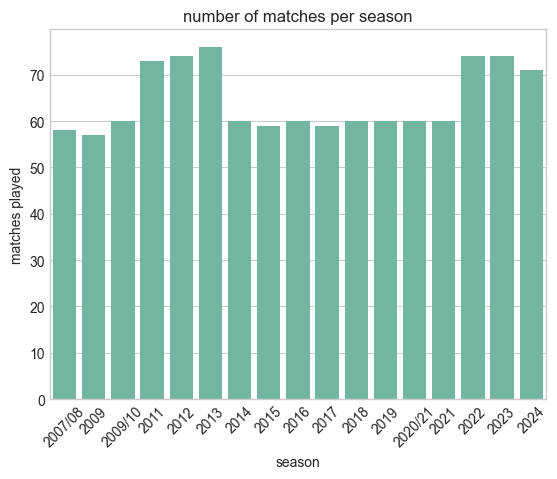

In [16]:
season_wise =matches['season'].value_counts().sort_index()
plt.Figure(figsize=(10,6))
sns.barplot(x=season_wise.index,y=season_wise.values)
plt.title("number of matches per season")
plt.xlabel("season")
plt.xticks(rotation=45)
plt.ylabel("matches played")
plt.savefig("../output/macthes_per_season.png")
plt.show()

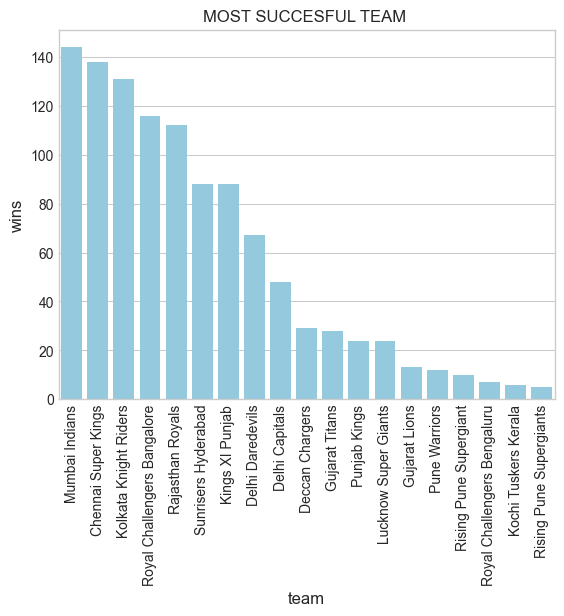

In [17]:
#most succesful team 
team_wins = matches['winner'].value_counts()
plt.Figure(figsize=(10,6))
sns.barplot(x=team_wins.index,y=team_wins.values,color="skyblue")
plt.title("MOST SUCCESFUL TEAM ")
plt.xticks(rotation=90)
plt.ylabel("wins",fontsize=12)
plt.xlabel("team", fontsize=12)
plt.savefig("../output/most_succesful_team.png",dpi=300,bbox_inches='tight')
plt.show()

In [18]:
#toss win impact
toss_match_win=(matches['toss_winner']==matches['winner']).mean()*100
print(f"percentage for toss win to match win {toss_match_win}")

percentage for toss win to match win 50.593607305936075


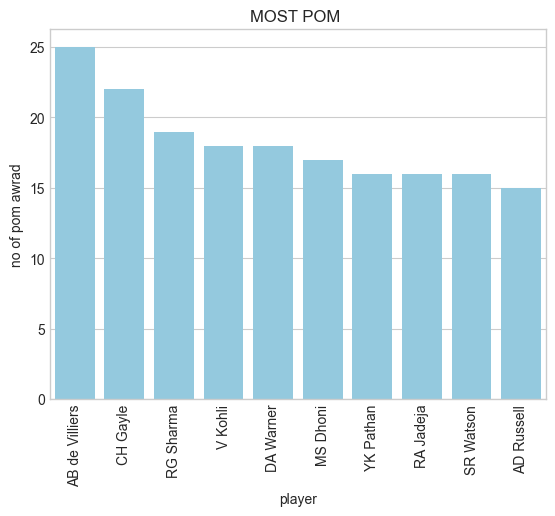

In [19]:
#__________Top player of the match____________
top_pom=matches['player_of_match'].value_counts().head(10)
plt.Figure(figsize=(10,6))
sns.barplot(x=top_pom.index,y=top_pom.values,color="skyblue")
plt.title("MOST POM ")
plt.xlabel('player')
plt.ylabel('no of pom awrad')
plt.xticks(rotation=90)
plt.savefig('../output/most_pom_PLAYER.png',dpi=300)
plt.show()

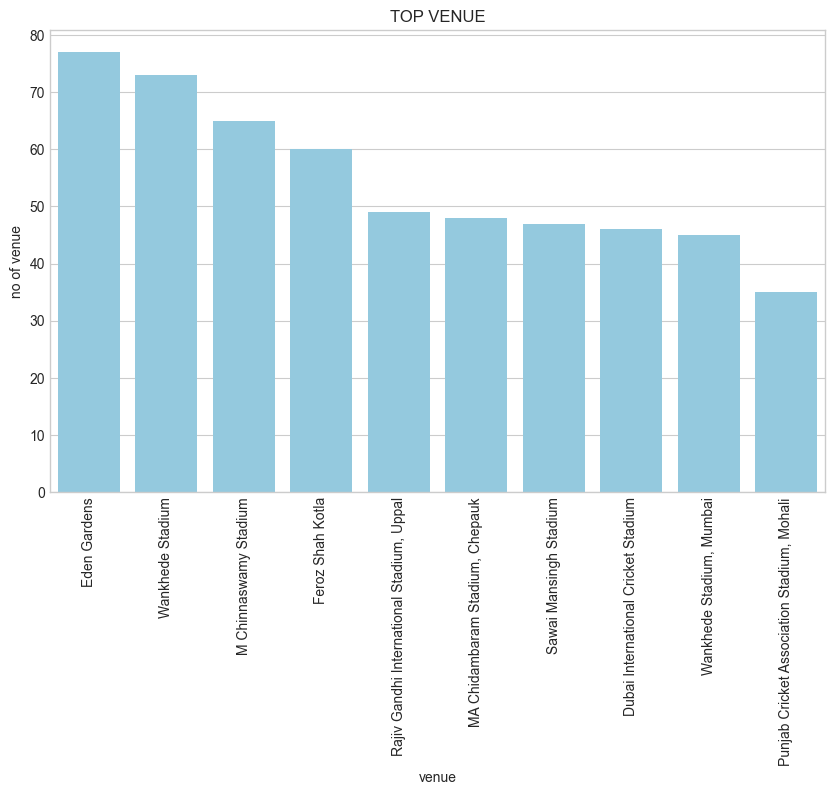

In [21]:
top_vanue = matches['venue'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_vanue.index,y=top_vanue.values,color="skyblue")
plt.title("TOP VENUE")
plt.xlabel('venue')
plt.ylabel('no of venue')
plt.xticks(rotation=90)
plt.savefig('../output/TOP_venue.png',dpi=300)
plt.show()

